<a href="https://colab.research.google.com/github/anmolsinghdz/Traffic-Sign-Recognition/blob/main/Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required library

In [ ]:
#import os to create a helper variable, which allows us to simply manage different paths in the code
import os

In [ ]:
#glob is used to return all the file paths that match a specific pattern
import glob

In [ ]:
#if we want to display a single image then "Image" library is fine, but if we want to display multiple images by just running a single cell
#then we need to import display
from IPython.display import Image,display

In [ ]:
#Checking the access to GPU

In [ ]:
!nvidia-smi

Wed May 10 07:47:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Creating a helper variable

In [ ]:
HOME=os.getcwd()

In [ ]:
print(HOME)

/content


In [ ]:
#Installing the YOLO v8

In [ ]:
!pip install ultralytics==8.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144573 sha256=425aacbddfc3ed25a0d9bad1dfa000a5de4928030dd882a75c435e1ed883f3d6
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Success

In [ ]:
#Check if the YOLO v8 is installed and is working fine

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
#Importing the dataset from Roboflow

In [ ]:
!mkdir {HOME}/datasets

In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yqfA3Q2k4xQztuI7SYR1")
project = rf.workspace("mohamed-atef-dwbkp").project("traffic-signs-detection-medium")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Traffic-Signs-Detection-Medium-2 in yolov5pytorch:: 100%|██████████| 6238/6238 [00:01<00:00, 3767.41it/s]


In [ ]:
#Traning the YOLO v8 model on custom dataset

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/Traffic-Signs-Detection-Medium-2/data.yaml' epochs=20 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 66.5MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Traffic-Signs-Detection-Medium-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, l

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1381.jpg
confusion_matrix.png				    train_batch1382.jpg
events.out.tfevents.1683398941.b54e4f940e76.3535.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1380.jpg


In [ ]:
#Printing the confusion matrix

In [ ]:
from IPython.display import Image

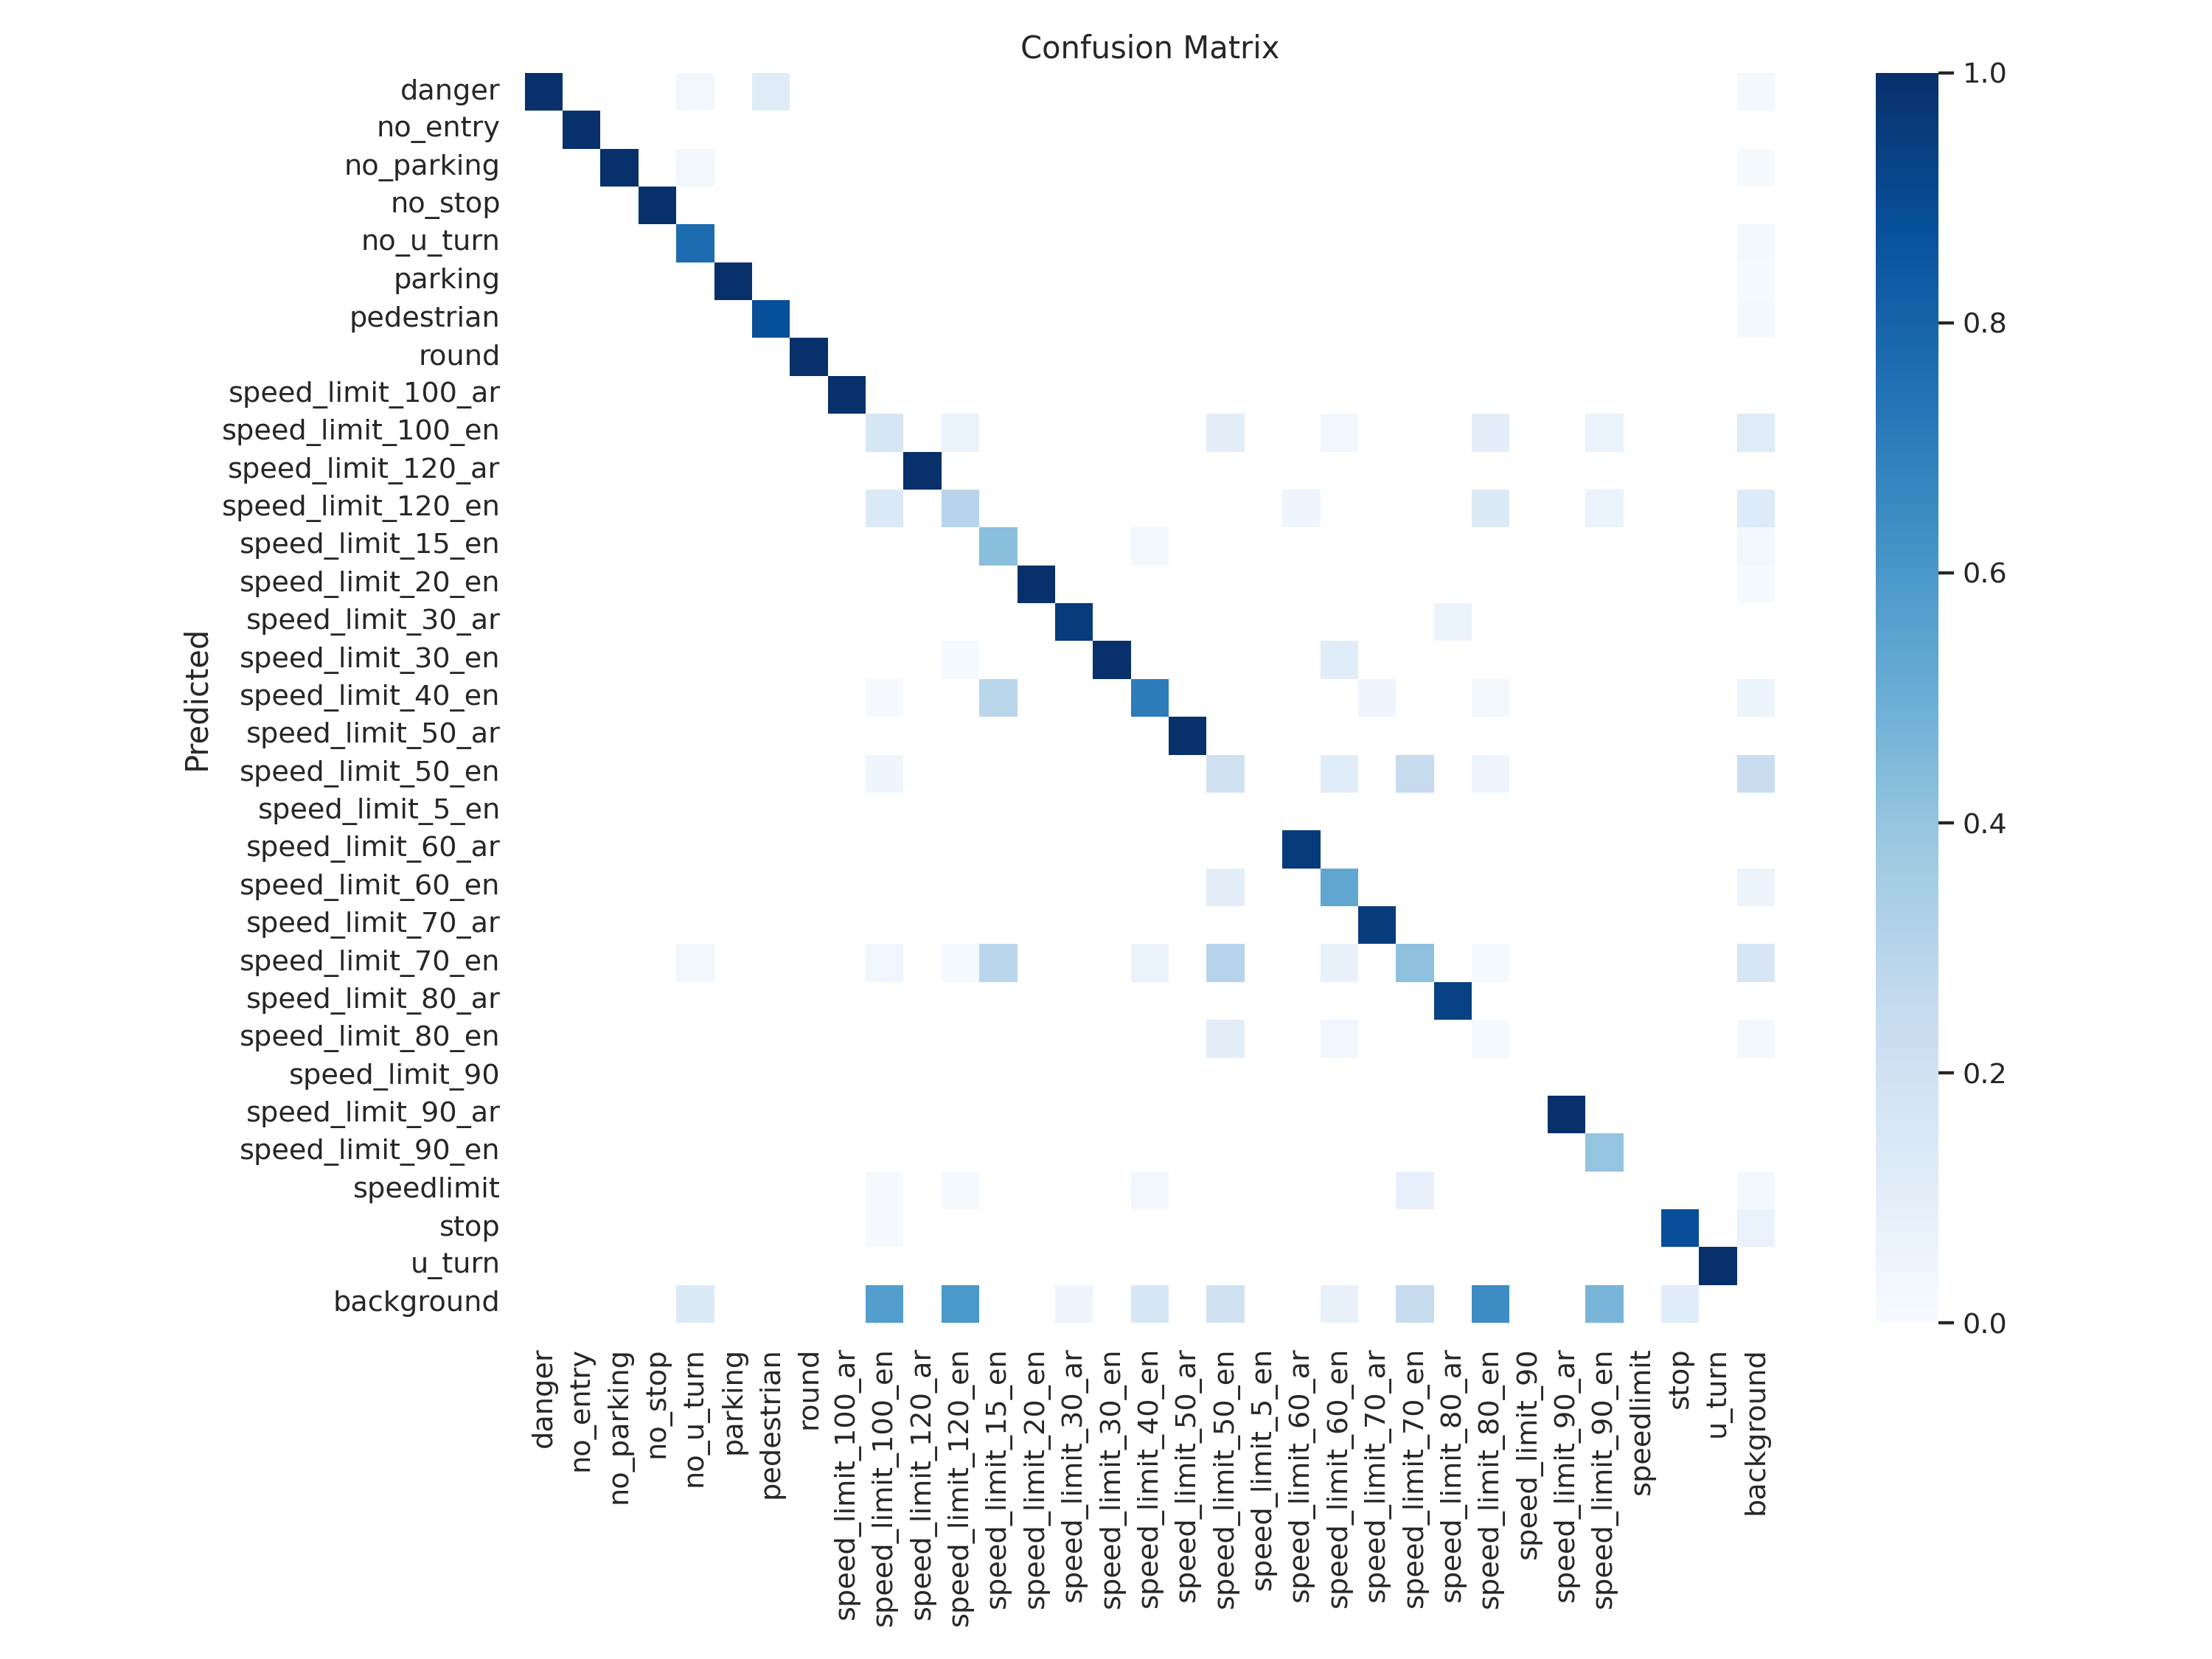

In [ ]:
Image(filename = f"{HOME}/runs/detect/train/confusion_matrix.png")

In [ ]:
#Checking the model prediction on validation set

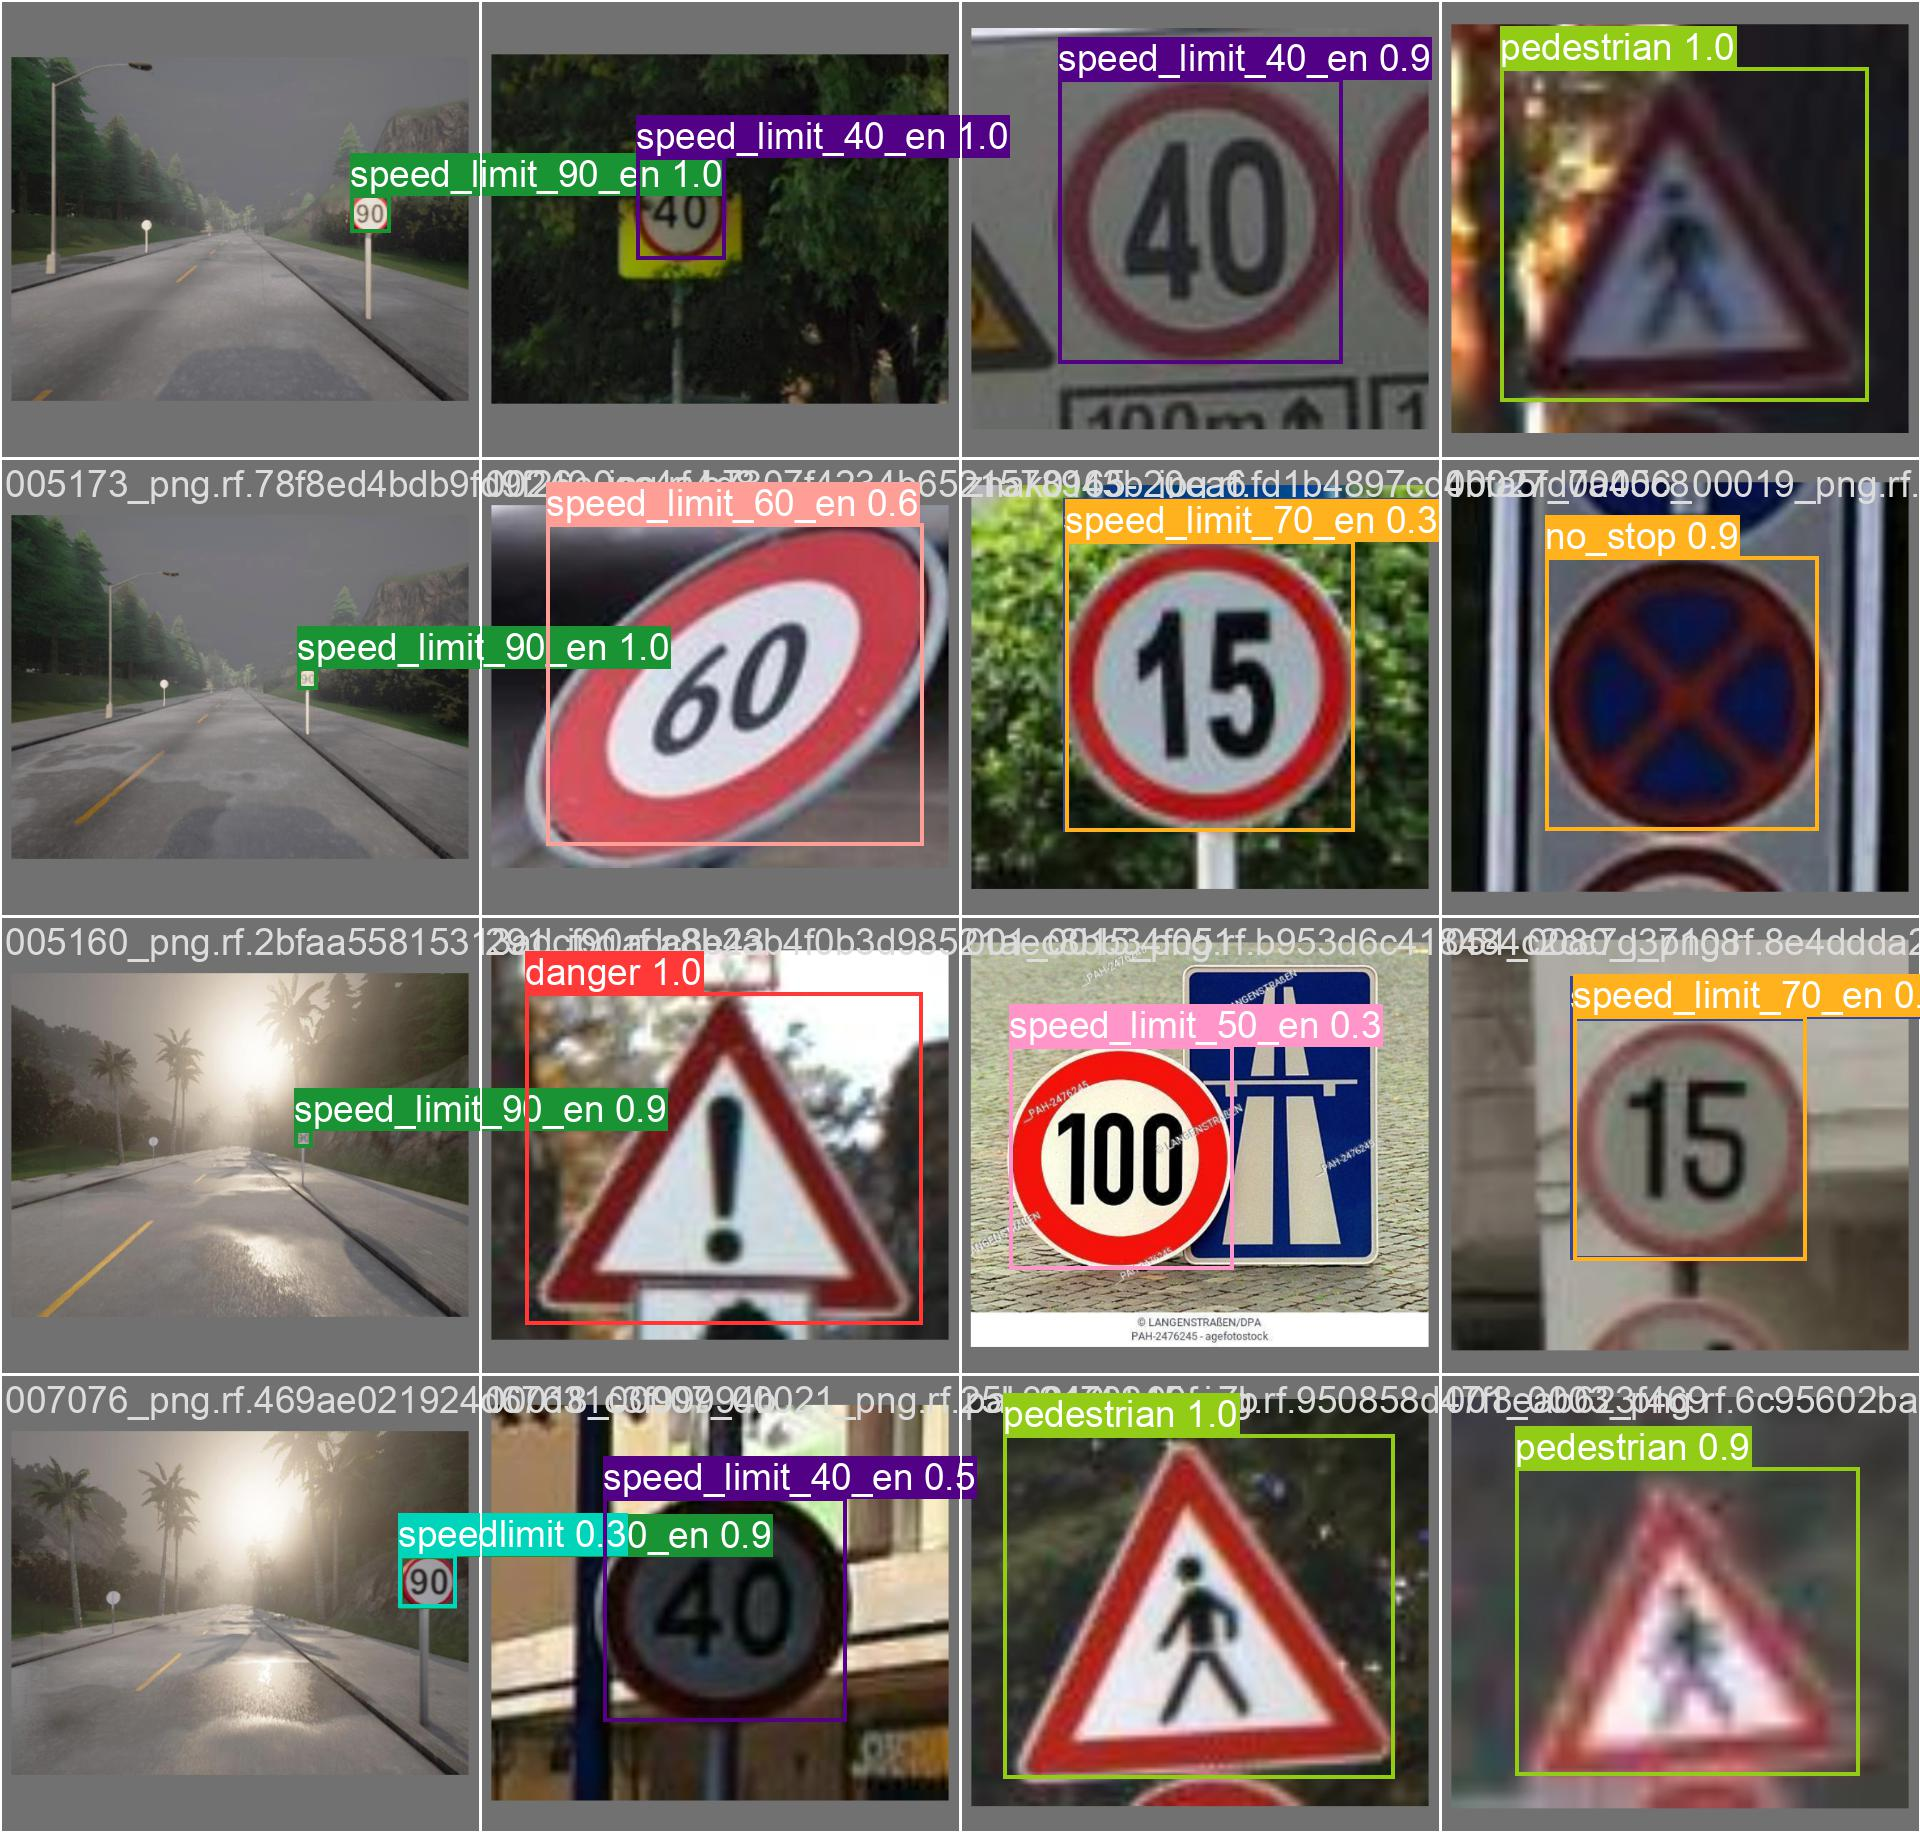

In [ ]:
Image(filename = f"{HOME}/runs/detect/train/val_batch2_pred.jpg", height=500)

In [ ]:
#Printing the training and validation loss

/content


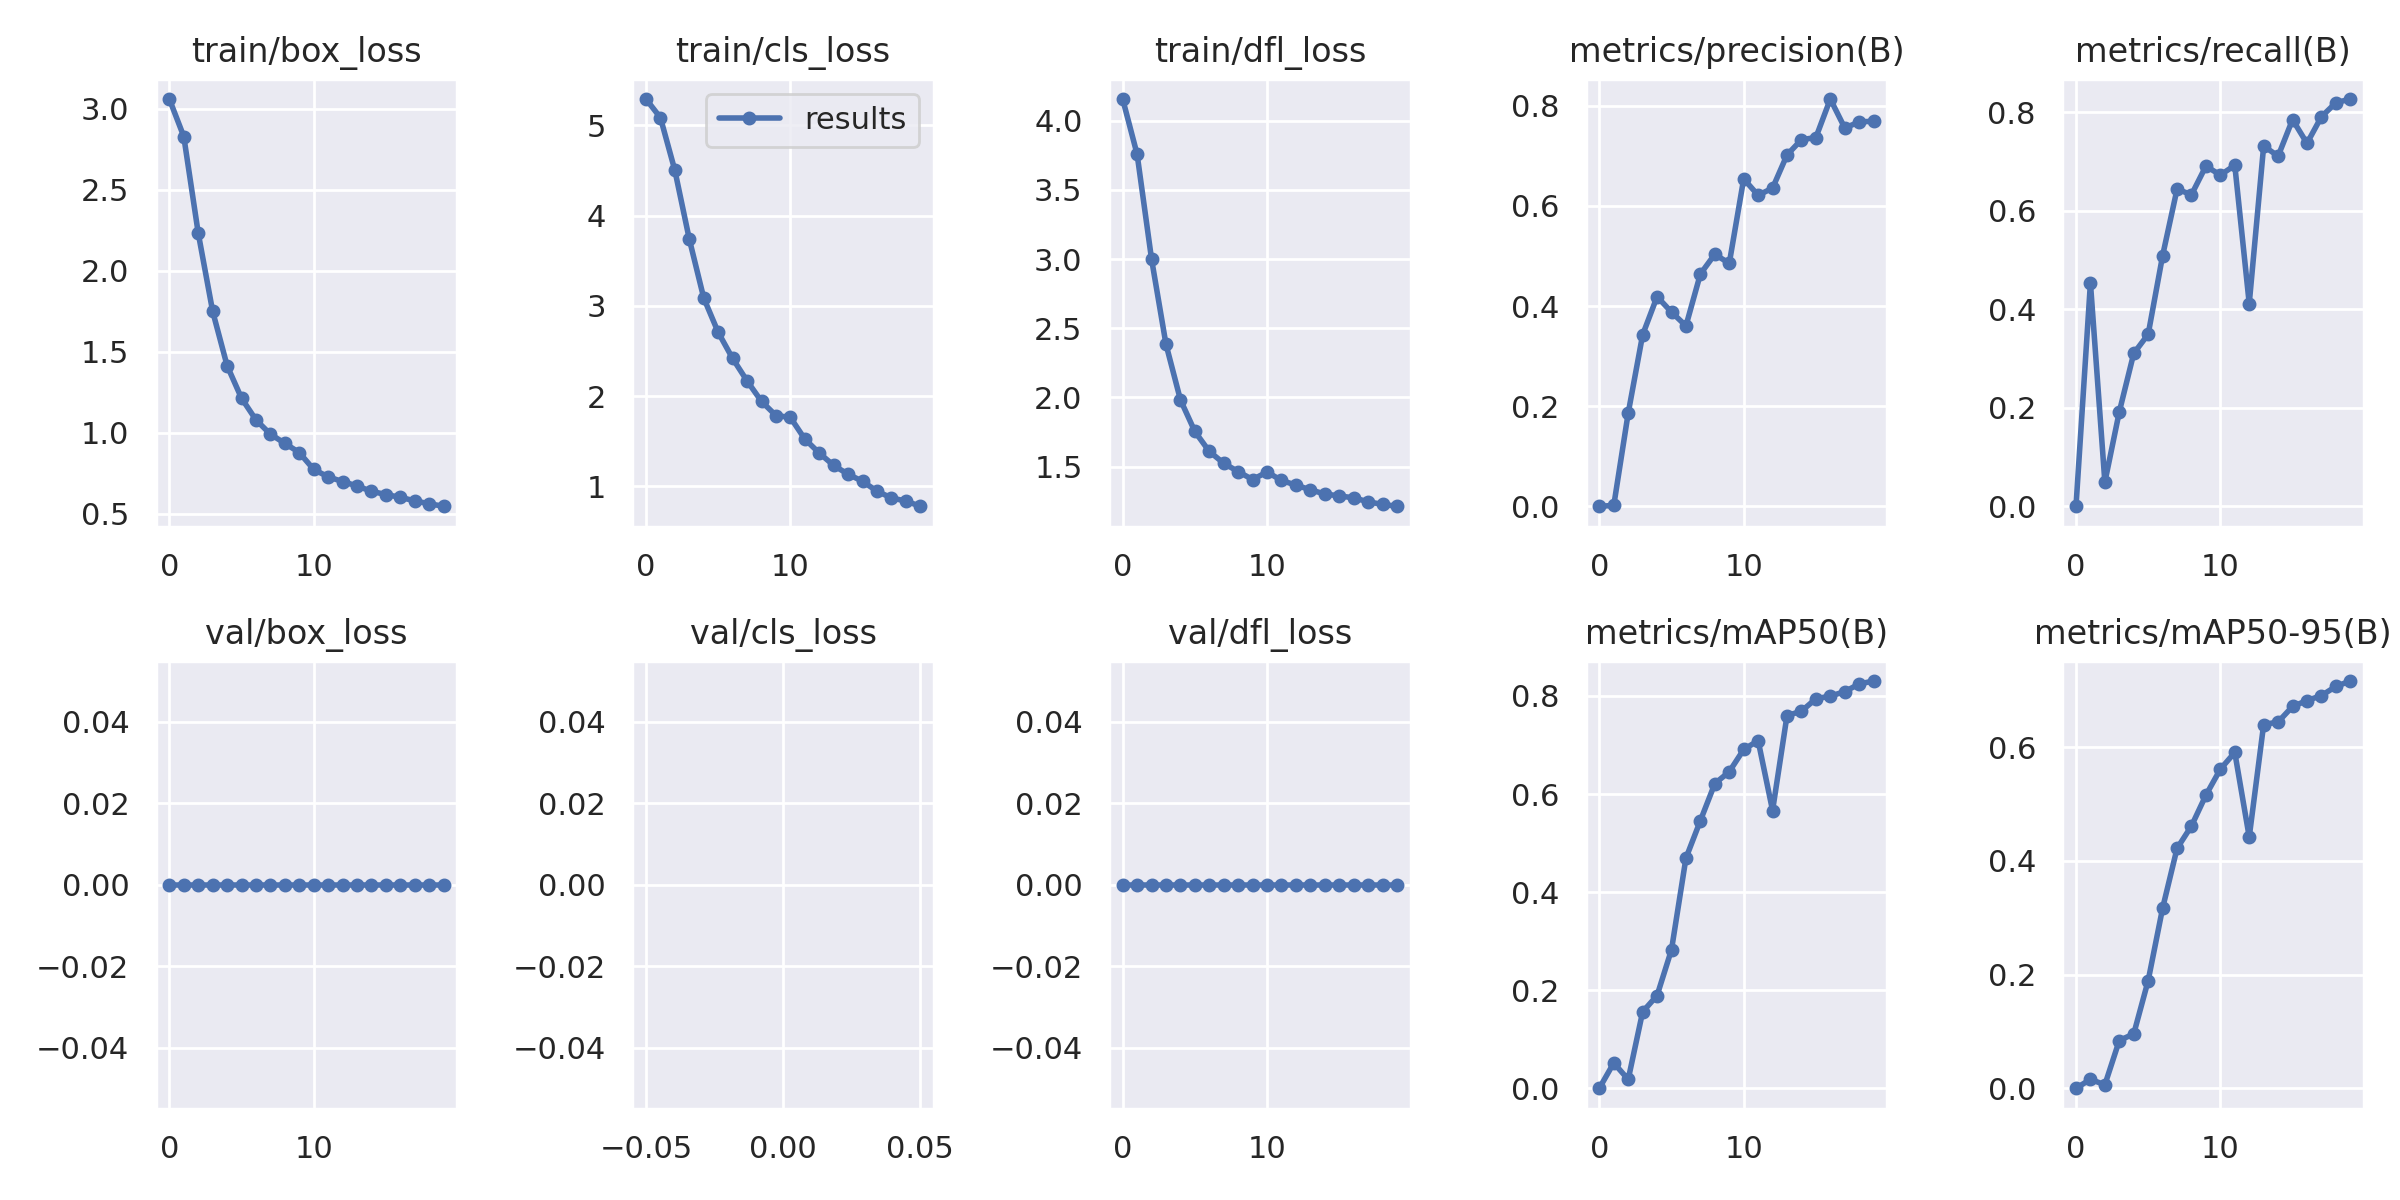

In [ ]:
%cd {HOME}
Image(filename = f"{HOME}/runs/detect/train/results.png", width=600)

In [ ]:
#Validate custom model

In [ ]:
!yolo task=detect mode=val model=f"{HOME}/runs/detect/train/weights/best.pt" data="/content/datasets/Traffic-Signs-Detection-Medium-2/data.yaml"

2023-05-06 19:24:26.730294: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 19:24:27.746454: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Error executing job with overrides: ['task=detect', 'mode=val', 'model=f/content/runs/detect/train/weights/best.pt', 'data=/content/datasets/Traffic-Signs-Detection-Medium-2/data.yaml']
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cli.py", line 52, in cli
    func(cfg)
  File "/usr/local/lib/python3.10/dist-packages/hydra/main.py", line 83, in decorated_main
    return task_function(cfg_passthrough)
  File "/usr/local/l

In [ ]:
#Inference with custom model

In [ ]:
#Downloading demo videos from google drive to google colab notebook

In [ ]:
!gdown "https://drive.google.com/file/d/1W8KOWX9NFTiuiotS3YgjL-1sEKmjZWJN/view?usp=share_link"

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1W8KOWX9NFTiuiotS3YgjL-1sEKmjZWJN
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1W8KOWX9NFTiuiotS3YgjL-1sEKmjZWJN/view?usp=share_link
To: /content/view?usp=share_link
1.05MB [00:00, 110MB/s]
